In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Read the csv file
file_path = ("../Resources/parkinsons_disease_data.csv")
park_df = pd.read_csv(file_path)
park_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [3]:
#dropping any rows with the missing values
park_df.dropna(axis=0, how='any')
park_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [4]:
park_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [5]:
#dropping unnecessary columns
park_df.drop(["DoctorInCharge"],axis = 1, inplace=True)


In [6]:
#removing duplicates
park_df.drop_duplicates()
park_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,8.336364,3.200969,0,0,0,1,0,1,0,0


In [7]:
#calculating the average age
avg_age = round(park_df['Age'].mean(),2)
avg_age


69.6

In [8]:
#basic information and statistics.

park_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2105.0,4110.000000,607.805479,3058.000000,3584.000000,4110.000000,4636.000000,5162.000000
Age,2105.0,69.601900,11.594511,50.000000,60.000000,70.000000,80.000000,89.000000
Gender,2105.0,0.492637,0.500065,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2105.0,0.692637,1.003827,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2105.0,1.337292,0.895840,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2105.0,27.209493,7.208099,15.008333,20.782176,27.184571,33.462452,39.999887
Smoking,2105.0,0.296437,0.456795,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2105.0,10.040413,5.687014,0.002228,5.150278,10.070337,14.829565,19.988866
PhysicalActivity,2105.0,5.016674,2.890919,0.004157,2.455703,5.031550,7.512795,9.995255
DietQuality,2105.0,4.912901,2.872115,0.000011,2.478503,4.825187,7.381487,9.995864


Number of Smokers: 624
Number of Non-Smokers: 2105


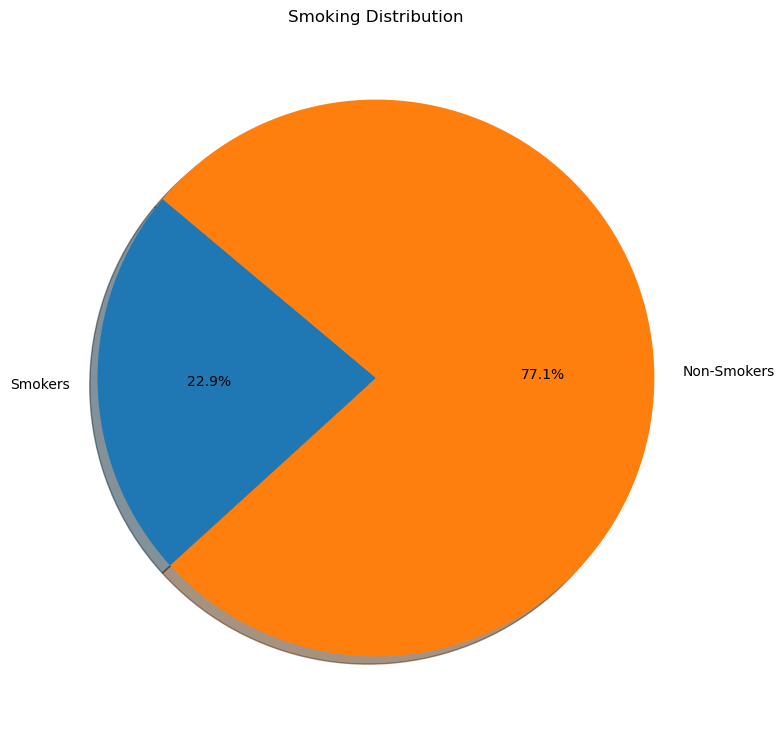

In [9]:
# Explicitly labeling smokers and non-smokers
num_smokers = park_df[park_df['Smoking'] == 1].shape[0]
num_non_smokers = park_df['Smoking'].shape[0]

print(f"Number of Smokers: {num_smokers}")
print(f"Number of Non-Smokers: {num_non_smokers}")

labels = ['Smokers', 'Non-Smokers']
sizes = [num_smokers, num_non_smokers]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Rotate to start from a better angle
    shadow=True  # Add a shadow for visual effect
)
plt.title('Smoking Distribution')
plt.tight_layout()

# Save and show the pie chart
plt.savefig('./Images/smoking_distribution_pie_chart.png')
plt.show()




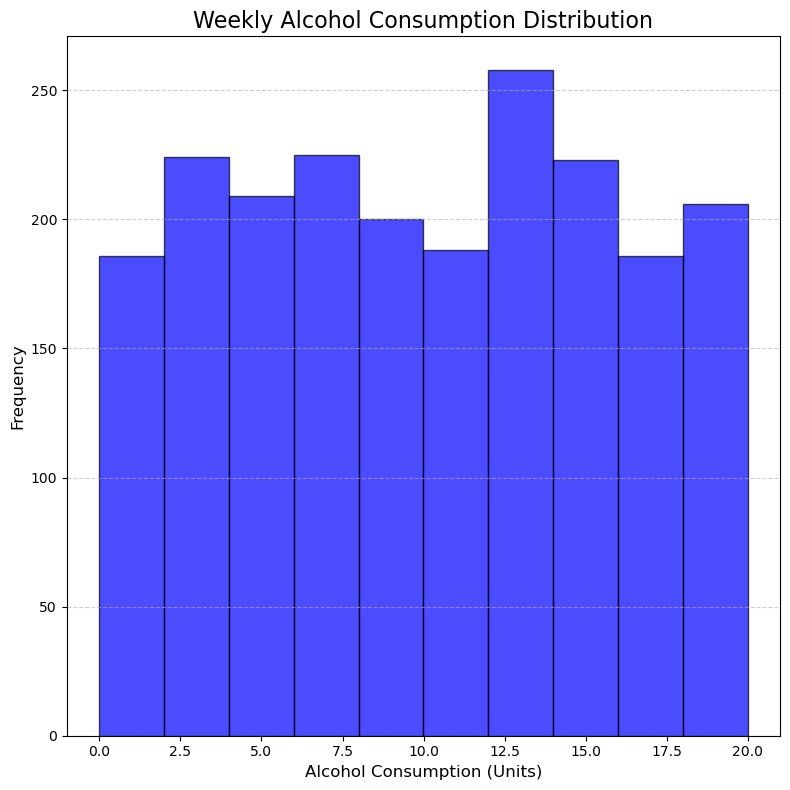

In [48]:
# Visulaisation of Alcohol Consumption: Weekly alcohol consumption in units, ranging from 0 to 20.

# Create the figure
plt.figure(figsize=(8, 8))

# Plot the hist for AlcoholConsumption
plt.hist(
    park_df['AlcoholConsumption'],  # Column containing weekly alcohol consumption data
    bins=10,  # Divide the range into 10 equal intervals
    color='blue',  # Customizne the color of the bars
    edgecolor='black',  # Add edges to the bars for clarity
    alpha=0.7  # Make bars slightly transparent for aesthetics
)

# Add title and axis labels
plt.title('Weekly Alcohol Consumption Distribution', fontsize=16)
plt.xlabel('Alcohol Consumption (Units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save and show the plot
plt.tight_layout()
plt.savefig('./Images/alcohol_consumption_distribution.png')
plt.show()


In [11]:
#Count of patients based on gender
female = park_df[park_df['Gender'] == 1].shape[0]
male = park_df['Gender'].shape[0]
print(f"Number of Males: {male}")
print(f"Number of females: {female}")


Number of Males: 2105
Number of females: 1037


In [12]:
#avg BMi
avg_BMI = round(park_df['BMI'].mean(),2)
avg_BMI


27.21

## Symptom Analysis ##

In [13]:
#Tremor: Presence of tremor, where 0 indicates No and 1 indicates Yes.

tremor=park_df[park_df['Tremor']==1].shape[0]
non_tremor=park_df.shape[0] 
tremor_data = [
    {'Type': 'Tremor', 'Count': tremor},
    {'Type': 'No Tremor', 'Count': non_tremor}
    ]

tremor_data


[{'Type': 'Tremor', 'Count': 909}, {'Type': 'No Tremor', 'Count': 2105}]

In [14]:
# Rigidity: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
Rigidity =park_df[park_df['Rigidity']==1].shape[0]
non_Rigidity =park_df.shape[0]

print(f"Number of count with Rigidity symptom: {Rigidity}")
print(f"Number of count without Rigidity Symptom: {non_Rigidity}")



Number of count with Rigidity symptom: 532
Number of count without Rigidity Symptom: 2105


In [15]:
#Bradykinesia: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes
Bradyknesia=park_df[park_df['Rigidity']==1].shape[0]
non_bradykinesia =park_df.shape[0]

print(f"Number of count with bradykinesia symptom: {Bradyknesia}")
print(f"Number of count without bradykinesia Symptom: {non_bradykinesia}")


Number of count with bradykinesia symptom: 532
Number of count without bradykinesia Symptom: 2105


## Diagnosis analysis ##

In [16]:
#Diagnosis: Diagnosis status for Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
diagnosis =park_df[park_df['Diagnosis']==1].shape[0]
non_diagnosis = park_df.shape[0]
Diagnosis_data = [
    {'Type': 'Diagnosis', 'Count': diagnosis},
    {'Type': 'Non Diagnosis', 'Count': non_diagnosis}
    ]
print(Diagnosis_data)


[{'Type': 'Diagnosis', 'Count': 1304}, {'Type': 'Non Diagnosis', 'Count': 2105}]


## Ethincity analysis ##

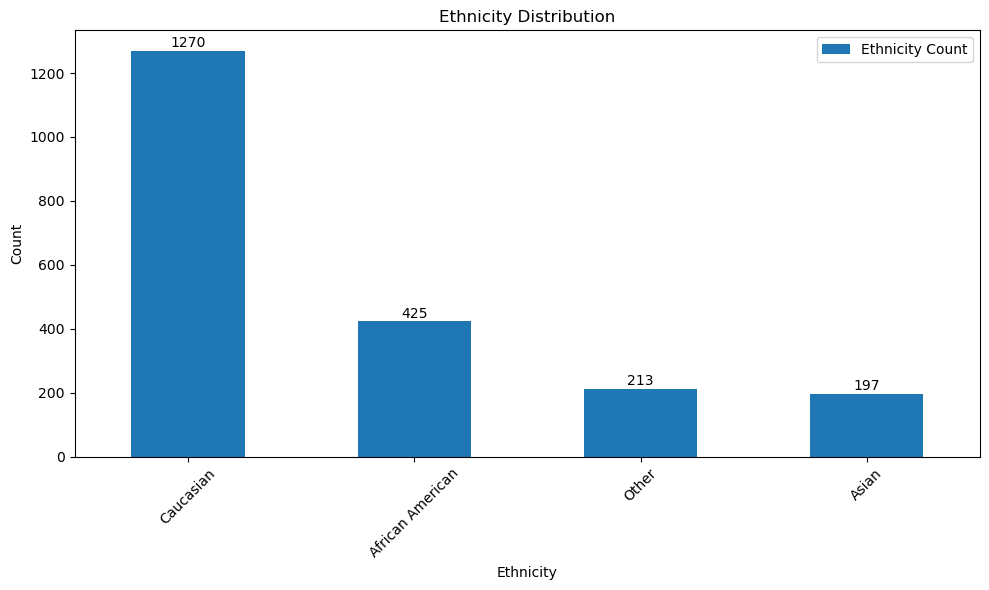

In [17]:
# Mapping for x-axis labels
labels_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

# Basic Ethnicity distribution
ethnicity_counts = park_df['Ethnicity'].value_counts()
ethnicity_percentages = park_df['Ethnicity'].value_counts(normalize=True) * 100

# Plot the graph
plt.figure(figsize=(10, 6))
ax = ethnicity_counts.plot(kind='bar', label='Ethnicity Count')

# Add labels to each bar
for i, count in enumerate(ethnicity_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Update x-axis labels using labels_mapping
new_labels = [labels_mapping.get(i, str(i)) for i in ethnicity_counts.index]
ax.set_xticklabels(new_labels, rotation=45)  # Apply new labels and rotate

# Add title, axis labels, and legend
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.tight_layout()
plt.legend(loc='upper right')

# Save and show the figure
plt.savefig('./Images/ethnicity_distribution_with_mapped_labels.png')
plt.show()


In [18]:
print(park_df.corr())


                          PatientID       Age    Gender  Ethnicity  \
PatientID                  1.000000  0.031130 -0.041670   0.000326   
Age                        0.031130  1.000000  0.008675   0.020966   
Gender                    -0.041670  0.008675  1.000000  -0.021080   
Ethnicity                  0.000326  0.020966 -0.021080   1.000000   
EducationLevel            -0.004348  0.015130 -0.011429   0.029189   
BMI                        0.023436  0.035622  0.072500  -0.003830   
Smoking                    0.039808 -0.007591 -0.038296   0.052649   
AlcoholConsumption         0.007525 -0.009016 -0.020645   0.021406   
PhysicalActivity          -0.056760  0.028100 -0.002626   0.011913   
DietQuality               -0.058008  0.012580 -0.005765  -0.027598   
SleepQuality              -0.019042  0.020866 -0.014885  -0.011927   
FamilyHistoryParkinsons   -0.037387  0.008502 -0.027567   0.005848   
TraumaticBrainInjury       0.004916 -0.005293 -0.016488   0.002839   
Hypertension        

## Cognitive and Functional Assessments ##


In [19]:
# Filter patients meeting all conditions
filtered_patients = park_df[
    (park_df["UPDRS"] > 100) & 
    (park_df["FunctionalAssessment"] < 5) & 
    (park_df["MoCA"] < 20)
]

results = filtered_patients[["PatientID", "UPDRS", "MoCA", "FunctionalAssessment"]]

# Display the result
print("Patients meeting all conditions:")
results



Patients meeting all conditions:


,PatientID,UPDRS,MoCA,FunctionalAssessment
7,3065,181.172565,11.065216,1.190611
8,3066,178.261521,10.936604,3.438111
11,3069,172.011909,5.645201,4.611534
13,3071,142.121341,9.630378,4.062880
15,3073,165.709398,19.616032,1.236369
...,...,...,...,...
2086,5144,136.394375,5.330472,0.898147
2089,5147,129.624071,14.203152,2.846496
2090,5148,117.411196,6.035420,0.810232
2094,5152,104.033289,10.887978,0.449311


In [20]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


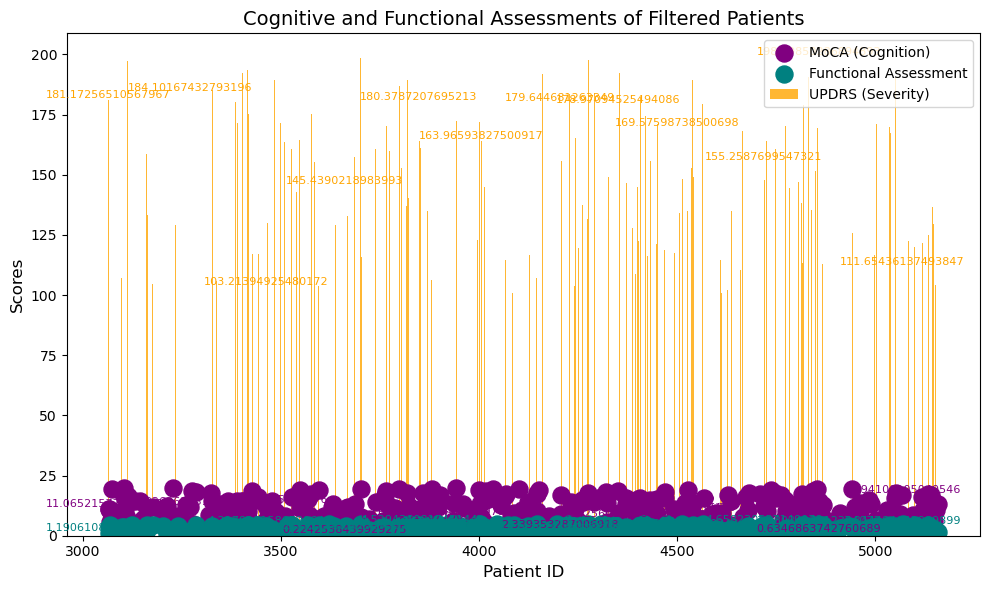

In [21]:
if not filtered_patients.empty:
    plt.style.use('tableau-colorblind10')
    plt.figure(figsize=(10, 6))

    # Bar Plot for UPDRS
    plt.bar(filtered_patients["PatientID"], filtered_patients["UPDRS"], color='orange', label="UPDRS (Severity)", alpha=0.8)

    # Scatter Plot for MoCA and FunctionalAssessment
    plt.scatter(filtered_patients["PatientID"], filtered_patients["MoCA"], color='purple', label="MoCA (Cognition)", s=150, zorder=2)
    plt.scatter(filtered_patients["PatientID"], filtered_patients["FunctionalAssessment"], color='teal', label="Functional Assessment", s=150, zorder=2)

    # Add selective data labels (e.g., every 10th data point)
    for index, row in filtered_patients.iloc[::30].iterrows():
        plt.text(row["PatientID"], row["UPDRS"], str(row["UPDRS"]), ha='center', va='bottom', fontsize=8, color='orange')
        plt.text(row["PatientID"], row["MoCA"], str(row["MoCA"]), ha='center', va='bottom', fontsize=8, color='purple')
        plt.text(row["PatientID"], row["FunctionalAssessment"], str(row["FunctionalAssessment"]), ha='center', va='bottom', fontsize=8, color='teal')

    # Add titles, labels, and legend
    plt.title("Cognitive and Functional Assessments of Filtered Patients", fontsize=14)
    plt.xlabel("Patient ID", fontsize=12)
    plt.ylabel("Scores", fontsize=12)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No patients meet the criteria to display.")


## Medical History Analysis ##

In [22]:
# Basic data exploration
print("Dataset Overview:")
print(park_df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int

In [23]:
# Count of patients with each condition
print("\nCondition Prevalence:")
medical_columns = [
    'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 
    'Hypertension', 'Diabetes', 'Depression', 'Stroke'
]

for column in medical_columns:
    count = park_df[column].sum()
    percentage = (count / len(park_df)) * 100
    print(f"{column}: {count} patients ({percentage:.2f}%)")





Condition Prevalence:
FamilyHistoryParkinsons: 307 patients (14.58%)
TraumaticBrainInjury: 224 patients (10.64%)
Hypertension: 307 patients (14.58%)
Diabetes: 312 patients (14.82%)
Depression: 432 patients (20.52%)
Stroke: 103 patients (4.89%)


In [24]:
# Identify patients with multiple conditions
def count_conditions(row):
    return row[medical_columns].sum()

park_df['Total_Conditions'] = park_df.apply(count_conditions, axis=1)
print("\nPatients by Number of Conditions:")
print(park_df['Total_Conditions'].value_counts().sort_index())



Patients by Number of Conditions:
Total_Conditions
0.0    882
1.0    841
2.0    314
3.0     56
4.0     12
Name: count, dtype: int64


In [25]:
# Correlation between conditions
print("\nCondition Correlations:")
correlation_matrix = park_df[medical_columns].corr()
correlation_matrix



Condition Correlations:


,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke
FamilyHistoryParkinsons,1.000000,0.036364,-0.018205,0.005670,-0.006680,0.018582
TraumaticBrainInjury,0.036364,1.000000,-0.011649,-0.013879,0.038258,-0.014001
Hypertension,-0.018205,-0.011649,1.000000,0.001882,-0.040007,0.012342
Diabetes,0.005670,-0.013879,0.001882,1.000000,0.029694,0.010744
Depression,-0.006680,0.038258,-0.040007,0.029694,1.000000,-0.017112
Stroke,0.018582,-0.014001,0.012342,0.010744,-0.017112,1.000000


In [26]:
import numpy as np


# Filter patients with specific condition combinations
def filter_patients(df, conditions):
    """
    Filter patients with specified conditions
    
    Parameters:
    df (pd.DataFrame): Input medical history DataFrame
    conditions (list): List of conditions to filter
    
    Returns:
    pd.DataFrame: Filtered patients meeting all specified conditions
    """
    mask = np.ones(len(df), dtype=bool)
    for condition in conditions:
        mask &= df[condition] == 1
    return df[mask]

# Example: Patients with both Parkinson's family history and hypertension
parkinsons_hypertension_patients = filter_patients(park_df, 
    ['FamilyHistoryParkinsons', 'Hypertension'])
print("\nPatients with Parkinson's Family History and Hypertension:")
parkinsons_hypertension_patients.head()


Patients with Parkinson's Family History and Hypertension:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,Total_Conditions
66,3124,58,1,0,2,17.497276,1,4.128080,6.518569,7.675491,...,3.127578,1,0,0,0,0,0,0,1,4.0
106,3164,56,0,3,1,16.472097,1,8.845307,3.754913,3.463191,...,9.282444,0,0,0,0,1,0,0,0,2.0
174,3232,85,1,0,1,33.372641,1,3.619158,7.377163,3.710211,...,4.745914,1,0,0,0,0,0,0,1,2.0
195,3253,50,0,3,2,35.088643,0,11.929395,0.555411,7.577986,...,1.752420,0,0,1,0,1,1,1,1,3.0
218,3276,65,1,0,1,25.559860,0,16.447904,1.240633,0.389642,...,0.173055,0,1,0,0,0,1,1,1,2.0


## Clinical Measurements Analysis ##

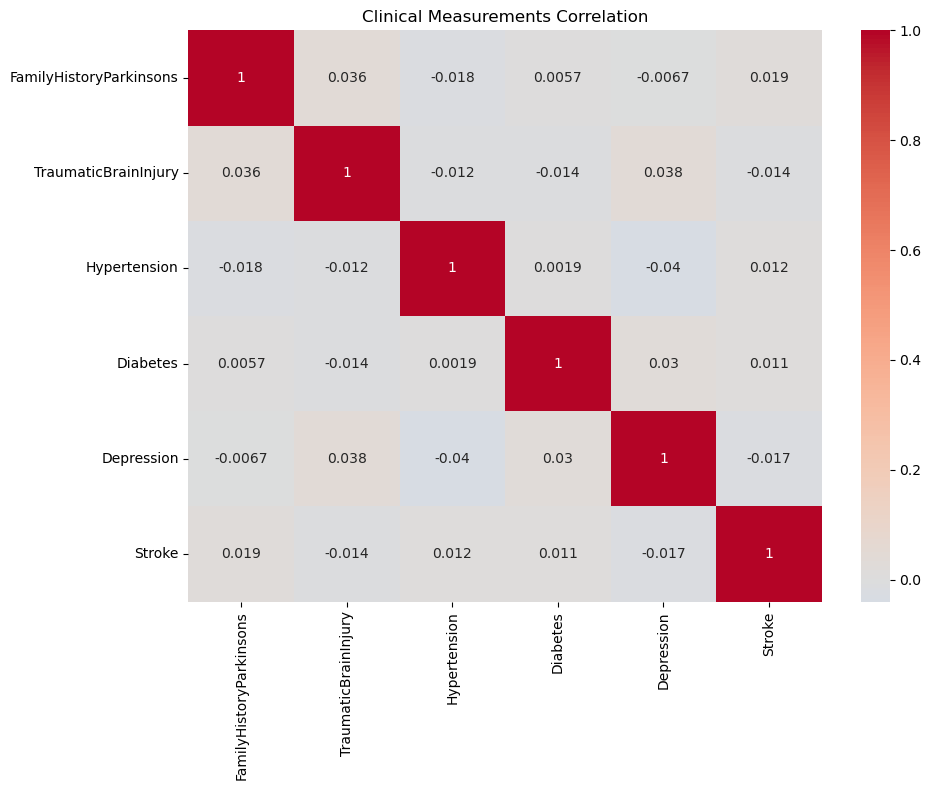

<Figure size 640x480 with 0 Axes>

In [34]:
# Verify columns exist in park_df
clinical_columns = [
    'SystolicBP', 'DiastolicBP', 
    'CholesterolTotal', 'CholesterolLDL', 
    'CholesterolHDL', 'CholesterolTriglycerides'
]

# Basic data validation
def validate_clinical_data(df, columns):
    """
    Validate clinical measurement columns
    """
    # Check for missing columns
    missing_cols = [col for col in columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns: {missing_cols}")
    
    # Check data types and ranges
    for col in columns:
        # Ensure numeric type
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Range checks based on given specifications
        range_checks = {
            'SystolicBP': (90, 180),
            'DiastolicBP': (60, 120),
            'CholesterolTotal': (150, 300),
            'CholesterolLDL': (50, 200),
            'CholesterolHDL': (20, 100),
            'CholesterolTriglycerides': (50, 400)
        }
        
        # Check and flag out-of-range values
        min_val, max_val = range_checks[col]
        out_of_range = df[(df[col] < min_val) | (df[col] > max_val)]
        if not out_of_range.empty:
            print(f"Warning: {col} has {len(out_of_range)} out-of-range values")
    
    return df

# Validate and prepare data
try:
    park_df = validate_clinical_data(park_df, clinical_columns)
except Exception as e:
    print(f"Data validation error: {e}")
    raise

# Analysis functions
def analyze_clinical_measurements(df):
    """
    Comprehensive analysis of clinical measurements
    """
    # Descriptive statistics
    desc_stats = df[clinical_columns].describe()
    
    # Correlation matrix
    correlation_matrix = df[clinical_columns].corr()
    
# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Clinical Measurements Correlation')
plt.tight_layout()
plt.show()
plt.savefig('./Images/clinical_correlation_heatmap.png')

    
    


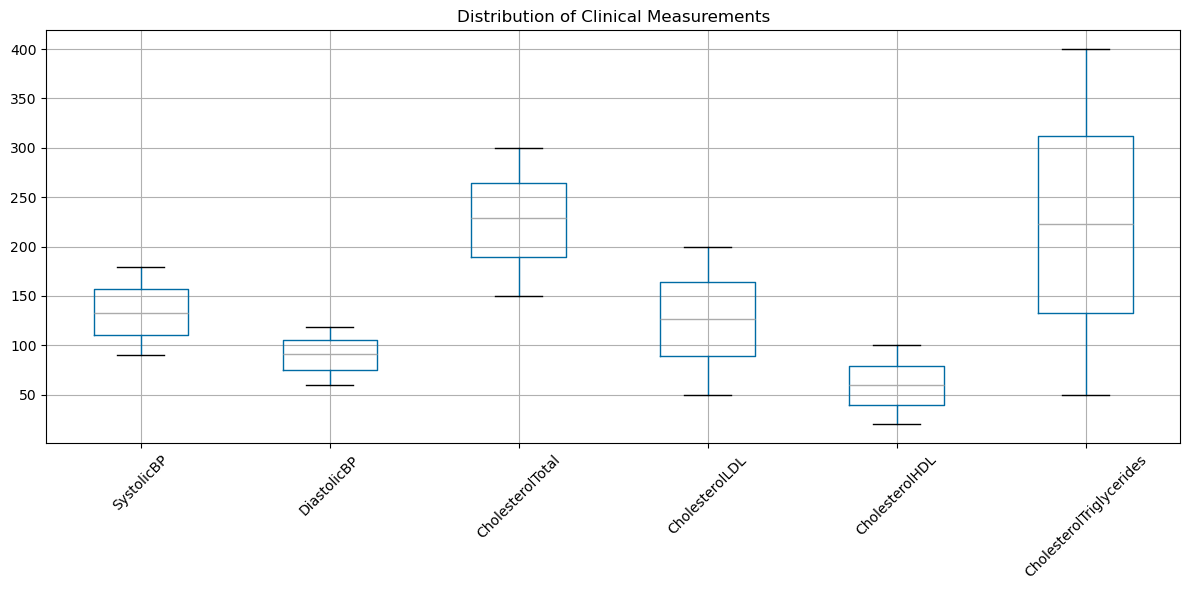

<Figure size 640x480 with 0 Axes>

In [46]:
 # Visualization: Box Plot
plt.figure(figsize=(12, 6))
park_df[clinical_columns].boxplot()
plt.title('Distribution of Clinical Measurements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('./Images/clinical_measurements_boxplot.png')

    


In [43]:
#Risk Categorization
def categorize_bp(row):
    if row['SystolicBP'] < 120 and row['DiastolicBP'] < 80:
        return 'Normal'
    elif (120 <= row['SystolicBP'] < 130) and row['DiastolicBP'] < 80:
        return 'Elevated'
    else:
        return 'High Blood Pressure'

def categorize_cholesterol(row):
    categories = []
    
    # Total Cholesterol
    if row['CholesterolTotal'] < 200:
        categories.append('Total Chol: Desirable')
    elif row['CholesterolTotal'] < 240:
        categories.append('Total Chol: Borderline')
    else:
        categories.append('Total Chol: High')
    
    # LDL Cholesterol
    if row['CholesterolLDL'] < 100:
        categories.append('LDL: Optimal')
    elif row['CholesterolLDL'] < 130:
        categories.append('LDL: Near Optimal')
    else:
        categories.append('LDL: High')
    
    return '; '.join(categories)

def analyze_clinical_measurements(df):
    # Columns of interest
    clinical_columns = [
        'SystolicBP', 'DiastolicBP', 
        'CholesterolTotal', 'CholesterolLDL', 
        'CholesterolHDL', 'CholesterolTriglycerides'
    ]
    
    # Descriptive statistics
    desc_stats = df[clinical_columns].describe()
    
    
    # Apply categorizations
    df['BP_Category'] = df.apply(categorize_bp, axis=1)
    df['Cholesterol_Category'] = df.apply(categorize_cholesterol, axis=1)
    
    # Summarize categorizations
    bp_summary = df['BP_Category'].value_counts()
    cholesterol_summary = df['Cholesterol_Category'].value_counts()
    
    return {
        'descriptive_statistics': desc_stats,
        'correlation_matrix': correlation_matrix,
        'blood_pressure_categories': bp_summary,
        'cholesterol_categories': cholesterol_summary
    }

# Run analysis
results = analyze_clinical_measurements(park_df)

# Print results
print("Descriptive Statistics:")
print(results['descriptive_statistics'])





Descriptive Statistics:
        SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL  \
count  2105.000000  2105.000000       2105.000000     2105.000000   
mean    133.719715    90.249881        226.860840      126.147858   
std      26.502355    17.061488         43.589406       43.407036   
min      90.000000    60.000000        150.062698       50.022828   
25%     110.000000    75.000000        189.385178       88.841960   
50%     133.000000    91.000000        228.528256      126.884570   
75%     157.000000   105.000000        264.608100      163.912782   
max     179.000000   119.000000        299.963074      199.985981   

       CholesterolHDL  CholesterolTriglycerides  
count     2105.000000               2105.000000  
mean        59.670352                222.940500  
std         23.370920                101.895822  
min         20.027981                 50.113604  
25%         39.538643                132.520174  
50%         59.343357                222.802452  
75% 

In [45]:
# Correlation matrix
correlation_matrix = park_df[clinical_columns].corr()
correlation_matrix

,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
SystolicBP,1.000000,0.022928,-0.002874,0.006790,0.027366,-0.020193
DiastolicBP,0.022928,1.000000,0.004478,-0.014595,-0.008830,-0.011899
CholesterolTotal,-0.002874,0.004478,1.000000,0.000094,0.026569,-0.017274
CholesterolLDL,0.006790,-0.014595,0.000094,1.000000,0.036736,0.020995
CholesterolHDL,0.027366,-0.008830,0.026569,0.036736,1.000000,0.020501
CholesterolTriglycerides,-0.020193,-0.011899,-0.017274,0.020995,0.020501,1.000000


In [37]:
print("\nBlood Pressure Categories:")
print(results['blood_pressure_categories'])



Blood Pressure Categories:
BP_Category
High Blood Pressure    1783
Normal                  243
Elevated                 79
Name: count, dtype: int64


In [36]:
print("\nCholesterol Categories:")
print(results['cholesterol_categories'])


Cholesterol Categories:
Cholesterol_Category
Total Chol: High; LDL: High                  429
Total Chol: Desirable; LDL: High             313
Total Chol: High; LDL: Optimal               282
Total Chol: Borderline; LDL: High            256
Total Chol: Desirable; LDL: Optimal          224
Total Chol: Borderline; LDL: Optimal         194
Total Chol: High; LDL: Near Optimal          173
Total Chol: Desirable; LDL: Near Optimal     128
Total Chol: Borderline; LDL: Near Optimal    106
Name: count, dtype: int64
